In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def display_image(title, image):
    plt.figure(figsize=(4,4))
    plt.title(title)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()
image = cv2.imread('image.jpg')

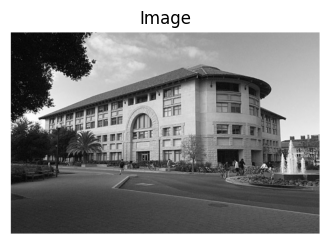

(476, 731, 3)

In [3]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
display_image('Image', image)
image.shape

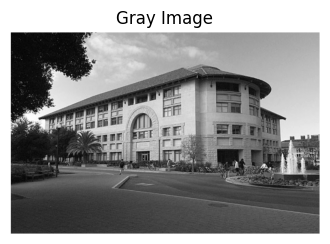

In [4]:
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
display_image('Gray Image', gray_image)

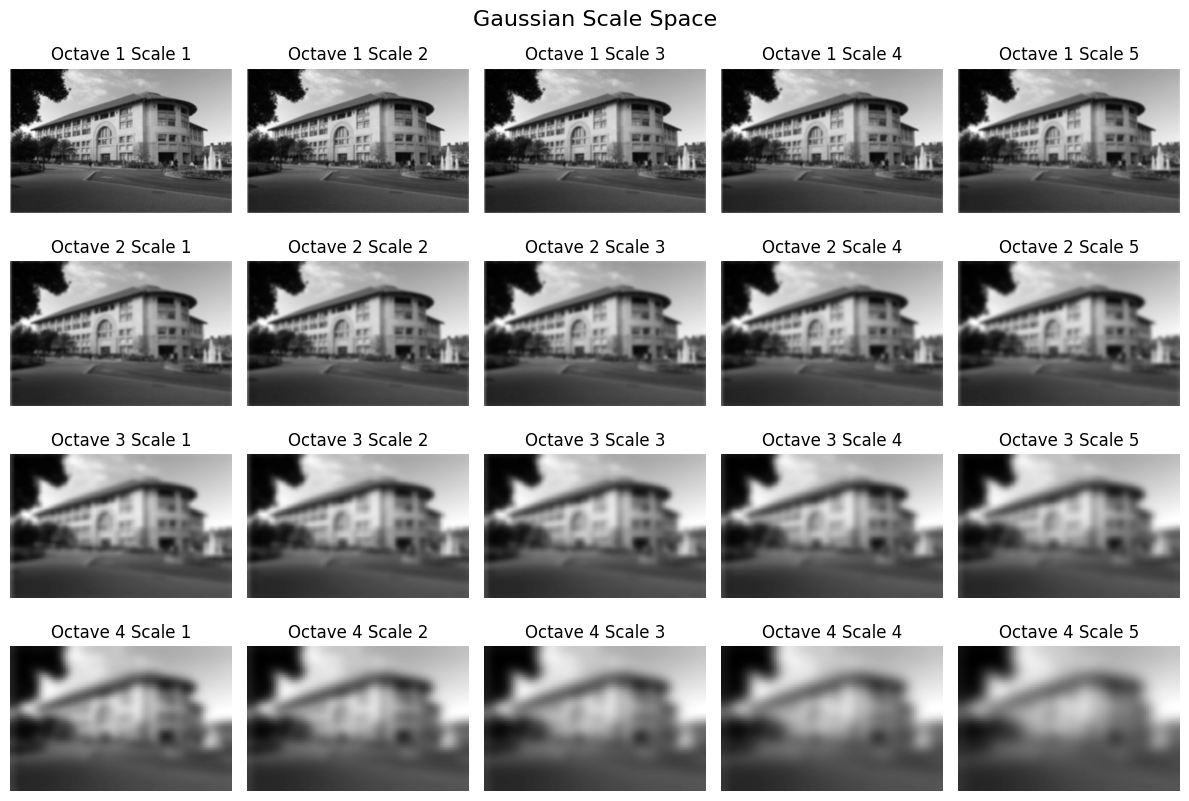

In [6]:
sift = cv2.SIFT_create()
def display_scale_space(image, num_octaves=4, num_scales=5):
    gaussian_pyramid = []
    current_image = image.copy()
    for octave in range(num_octaves):
        octave_images = []
        for scale in range(num_scales):
            sigma = 1.6 * (2 ** (scale / num_scales))
            blurred = cv2.GaussianBlur(current_image, (0, 0), sigmaX=sigma, sigmaY=sigma)
            octave_images.append(blurred)
        gaussian_pyramid.append(octave_images)
        
        current_image = cv2.pyrDown(current_image)
    return gaussian_pyramid


gaussian_pyramid = display_scale_space(gray_image)

plt.figure(figsize=(12, 8))
for octave in range(len(gaussian_pyramid)):
    for scale in range(len(gaussian_pyramid[octave])):
        plt.subplot(len(gaussian_pyramid), len(gaussian_pyramid[octave]), octave * len(gaussian_pyramid[octave]) + scale + 1)
        plt.imshow(gaussian_pyramid[octave][scale], cmap='gray')
        plt.title(f"Octave {octave+1} Scale {scale+1}")
        plt.axis('off')
plt.tight_layout()
plt.suptitle("Gaussian Scale Space", fontsize=16, y=1.02)
plt.show()

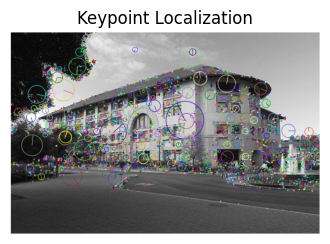

In [7]:
keypoints = sift.detect(gray_image, None)
image_w_keypoints = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
display_image('Keypoint Localization', image_w_keypoints)
def draw_keypoints_with_orientation(image, keypoints):
    image_with_orientations = image.copy()
    for kp in keypoints:
        angle = kp.angle
        x, y = kp.pt
        length = kp.size * 0.5 
        
        end_x = int(x + length * np.cos(np.deg2rad(angle)))
        end_y = int(y + length * np.sin(np.deg2rad(angle)))
        
        cv2.line(image_with_orientations, (int(x), int(y)), (end_x, end_y), (0, 255, 0), 1)
    return image_with_orientations

image_with_orientations = draw_keypoints_with_orientation(image, keypoints)

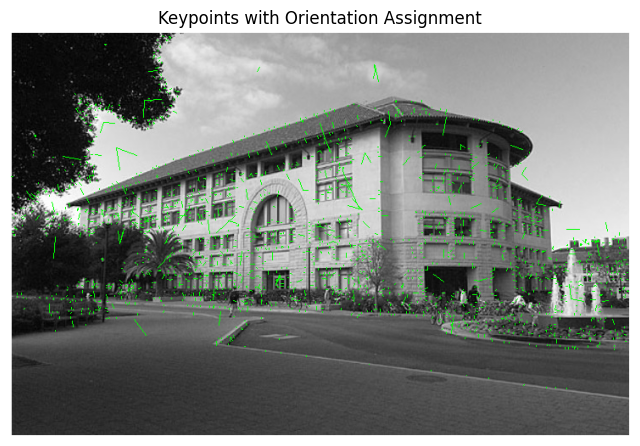

In [9]:
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(image_with_orientations, cv2.COLOR_BGR2RGB))
plt.title("Keypoints with Orientation Assignment")
plt.axis('off')
plt.show()

keypoints, descriptors = sift.compute(gray_image, keypoints)

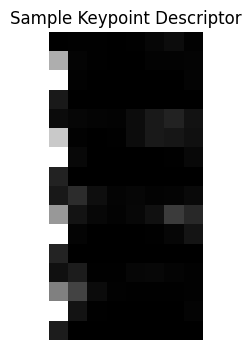

Number of keypoints detected: 2557
Sample descriptor (first keypoint):
[  0.   1.   1.   0.   1.   5.  10.   2. 142.   4.   1.   0.   0.   3.
   3.   4. 208.   2.   0.   0.   0.   0.   0.   4.  21.   0.   0.   0.
   0.   0.   0.   0.   9.   5.   4.   3.  10.  21.  28.  15. 164.   2.
   0.   1.  10.  21.  18.  13. 208.   7.   0.   0.   0.   0.   1.   7.
  28.   0.   0.   0.   0.   0.   0.   0.  20.  37.  12.   4.   5.   3.
   4.   8. 124.  16.   6.   3.   6.  13.  48.  33. 208.   4.   0.   0.
   0.   1.   5.  17.  29.   0.   0.   0.   0.   0.   0.   0.  13.  23.
   1.   1.   5.   6.   4.   2. 104.  55.   9.   2.   1.   1.   1.   2.
 208.  16.   1.   0.   0.   0.   0.   4.  23.   0.   0.   0.   0.   0.
   0.   0.]


In [10]:
def visualize_descriptor(descriptor):
    
    descriptor_image = descriptor.reshape(16, 8)  
    plt.figure(figsize=(4, 4))
    plt.imshow(descriptor_image, cmap='gray', interpolation='nearest')
    plt.title("Sample Keypoint Descriptor")
    plt.axis('off')
    plt.show()

if len(descriptors) > 0:
    visualize_descriptor(descriptors[0])
print(f"Number of keypoints detected: {len(keypoints)}")
print("Sample descriptor (first keypoint):")
print(descriptors[0])

In [1]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
!git reset --hard 064365d8683fd002e9ad789c1e91fa3d021b44f0

Cloning into 'yolov5'...
remote: Enumerating objects: 17050, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (20/20), done.


In [2]:
!pip install -qr requirements.txt  
import torch

from IPython.display import Image, clear_output  
from utils.downloads import attempt_download  

print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.0 MB/s eta 0:00:00
Setup complete. Using torch 2.5.0+cu121 CPU


In [3]:
!pip install -q roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Awfsxtk5OsUIpnuHP03u")
project = rf.workspace("signlanguage-mrsyj").project("object-guksz")
version = project.version(1)
dataset = version.download("yolov5")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.6 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to object-1 in yolov5pytorch:: 100%|██████████| 164/164 [00:00<00:00, 4618.04it/s]


In [4]:
%cd /content/yolov5

/content/yolov5


In [5]:
%cat {dataset.location}/data.yaml

names:
- boat
- parachute
- person
nc: 3
roboflow:
  license: CC BY 4.0
  project: object-guksz
  url: https://universe.roboflow.com/signlanguage-mrsyj/object-guksz/dataset/1
  version: 1
  workspace: signlanguage-mrsyj
test: ../test/images
train: object-1/train/images
val: object-1/valid/images


In [6]:
import yaml
with open(dataset.location + "/data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [7]:
%cat /content/yolov5/models/yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]]

In [9]:
%%time
%cd /content/yolov5/
!python train.py --img 640 --batch 16 --epochs 1 --data {dataset.location}/data.yaml --cfg ./models/yolov5s.yaml --weights yolov5s.pt --name yolov5s_results  --cache

/content/yolov5
2024-11-07 17:26:18.018891: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-07 17:26:18.051925: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-07 17:26:18.061509: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-07 17:26:18.088791: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-07 17:26:20.358009: W tensorf

In [10]:
%%time
%cd /content/yolov5/
!python detect.py --img 640 --weights runs/train/yolov5s_results2/weights/best.pt --img 640 --conf 0.4 --source {dataset.location}/test/images/adv8_jpg.rf.105ef10c3272a1601f649bee59eb81cd.jpg

/content/yolov5
detect: weights=['runs/train/yolov5s_results2/weights/best.pt'], source=/content/yolov5/object-1/test/images/adv8_jpg.rf.105ef10c3272a1601f649bee59eb81cd.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-72-g064365d8 Python-3.10.12 torch-2.5.0+cu121 CPU

/content/yolov5/models/experimental.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-mod

%cd /content/yolov5/
!python detect.py --weights runs/train/yolov5s_results/weights/best.pt --img 640 --conf 0.4 --source Cash-Counter-10/test/images/